# 🧪 Desafio QA Python

In [96]:
# Importar Bibliotecas necessárias
import pandas as pd
import numpy as np
import json
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
sns.set_style("whitegrid")
plt.figure(figsize=(10, 5))

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

In [42]:
def carregar_dados(caminho_arquivo):
    try:
        with open(caminho_arquivo, 'r', encoding='utf-8') as file:
            dados = json.load(file)
        return pd.DataFrame(dados)
    except Exception as e:
        print(f"Erro ao carregar arquivo: {e}")
        return None

df_vendas = carregar_dados('dados_vendas.json')

print("\nDataFrame:")
display(df_vendas.head(20))



DataFrame:


,id,produto_id,nome_produto,categoria,preco,quantidade,data_venda,cliente_id,vendedor_id,regiao
0,1,P001,Smartphone Galaxy S21,Eletrônicos,2999.99,2,2024-01-15,C001,V001,São Paulo
1,2,P002,Notebook Dell Inspiron,Eletrônicos,-1500.00,1,2024-01-16,C002,V001,Rio de Janeiro
2,3,P003,Fone de Ouvido Bluetooth,Acessórios,299.99,5,2024-01-17,C003,V002,Belo Horizonte
3,4,P001,Smartphone Galaxy S21,Eletrônicos,2999.99,1,2024-01-18,C004,V003,São Paulo
4,5,P004,Mouse Gamer RGB,Periféricos,199.99,999999,2024-01-19,C005,V002,Curitiba
5,6,P005,Teclado Mecânico,Periféricos,450.00,3,2030-12-31,C006,V001,Porto Alegre
6,7,P006,Monitor 4K,Eletrônicos,1899.99,1,2024-01-20,C007,V003,São Paulo
7,8,P007,Webcam HD,Acessórios,150.00,-2,2024-01-21,C008,V002,Brasília
8,9,P008,Impressora Laser,Papelaria,899.99,1,1900-01-01,C009,V001,Salvador
9,10,P009,Tablet Samsung,Eletrônicos,1299.99,2,2024-01-22,C010,V003,Recife


In [ ]:
class ValidadorDados:
    def __init__(self, df):
        self.df = df.copy()
        self.problemas = pd.DataFrame(columns=['id_registro', 'campo', 'problema', 'severidade'])
        self.metricas = {}
        
    def validar_precos(self):
        """Valida se os preços estão dentro de expectativas razoáveis"""
        # Preços negativos
        mask_negativos = self.df['preco'] < 0
        if mask_negativos.any():
            registros = self.df.loc[mask_negativos, 'id'].tolist()
            for id_reg in registros:
                self._registrar_problema(id_reg, 'preco', 'Preço negativo', 'alta')
        
        # Preços zero
        mask_zero = self.df['preco'] == 0
        if mask_zero.any():
            registros = self.df.loc[mask_zero, 'id'].tolist()
            for id_reg in registros:
                self._registrar_problema(id_reg, 'preco', 'Preço zero', 'media')
                
        # Preços muito altos 
        mask_alto = self.df['preco'] > 10000
        if mask_alto.any():
            registros = self.df.loc[mask_alto, 'id'].tolist()
            for id_reg in registros:
                self._registrar_problema(id_reg, 'preco', 'Preço muito alto', 'media')
    
    def validar_quantidades(self):
        """Valida se as quantidades são válidas"""
        # Quantidades negativas
        mask_negativas = self.df['quantidade'] < 0
        if mask_negativas.any():
            registros = self.df.loc[mask_negativas, 'id'].tolist()
            for id_reg in registros:
                self._registrar_problema(id_reg, 'quantidade', 'Quantidade negativa', 'alta')
        
        # Quantidades muito altas 
        mask_alta = self.df['quantidade'] > 1000
        if mask_alta.any():
            registros = self.df.loc[mask_alta, 'id'].tolist()
            for id_reg in registros:
                self._registrar_problema(id_reg, 'quantidade', 'Quantidade muito alta', 'media')
    
    def validar_datas(self):
        """Valida se as datas estão dentro de períodos razoáveis"""
        hoje = datetime.now().date()
        self.df['data_venda'] = pd.to_datetime(self.df['data_venda']).dt.date
        
        # Datas no futuro
        mask_futuro = self.df['data_venda'] > hoje
        if mask_futuro.any():
            registros = self.df.loc[mask_futuro, 'id'].tolist()
            for id_reg in registros:
                self._registrar_problema(id_reg, 'data_venda', 'Data no futuro', 'alta')
        
        # Datas muito antigas 
        mask_antiga = self.df['data_venda'] < datetime(2000, 1, 1).date()
        if mask_antiga.any():
            registros = self.df.loc[mask_antiga, 'id'].tolist()
            for id_reg in registros:
                self._registrar_problema(id_reg, 'data_venda', 'Data muito antiga', 'media')
    
    def validar_categorias(self):
        """Valida se as categorias são consistentes"""
        categorias_validas = ['Eletrônicos', 'Acessórios', 'Periféricos', 'Papelaria', 'Rede', 'Cabo']
        mask_invalidas = ~self.df['categoria'].isin(categorias_validas)
        
        if mask_invalidas.any():
            registros = self.df.loc[mask_invalidas, 'id'].tolist()
            for id_reg in registros:
                self._registrar_problema(id_reg, 'categoria', 'Categoria inválida', 'baixa')
    
    def _registrar_problema(self, id_registro, campo, problema, severidade):
        """Registra um problema encontrado"""
        novo_problema = pd.DataFrame({
            'id_registro': [id_registro],
            'campo': [campo],
            'problema': [problema],
            'severidade': [severidade]
        })
        self.problemas = pd.concat([self.problemas, novo_problema], ignore_index=True)
    
    def executar_validacoes(self):
        """Executa todas as validações"""
        self.validar_precos()
        self.validar_quantidades()
        self.validar_datas()
        self.validar_categorias()
        
        # Calcular métricas
        self.metricas['total_registros'] = len(self.df)
        self.metricas['registros_com_problemas'] = self.problemas['id_registro'].nunique()
        self.metricas['taxa_erros'] = self.metricas['registros_com_problemas'] / self.metricas['total_registros']
        
        return self.problemas, self.metricas
    
    def gerar_relatorio(self):
        """Gera um relatório resumido dos problemas encontrados"""
        if self.problemas.empty:
            print("Nenhum problema encontrado nos dados!")
            return
        
        print("\n=== RELATÓRIO DE PROBLEMAS ENCONTRADOS ===")
        print(f"Total de registros analisados: {self.metricas['total_registros']}")
        print(f"Registros com problemas: {self.metricas['registros_com_problemas']}")
        print(f"Taxa de erros: {self.metricas['taxa_erros']:.2%}")
        
        print("\nProblemas por severidade:")
        print(self.problemas['severidade'].value_counts())
        
        print("\nProblemas por campo:")
        print(self.problemas['campo'].value_counts())
        
        print("\nExemplos de problemas encontrados:")
        print(self.problemas.head(10))

In [45]:
validador = ValidadorDados(df_vendas)
problemas, metricas = validador.executar_validacoes()

validador.gerar_relatorio()


=== RELATÓRIO DE PROBLEMAS ENCONTRADOS ===
Total de registros analisados: 20
Registros com problemas: 6
Taxa de erros: 30.00%

Problemas por severidade:
severidade
alta     3
media    3
Name: count, dtype: int64

Problemas por campo:
campo
preco         2
quantidade    2
data_venda    2
Name: count, dtype: int64

Exemplos de problemas encontrados:
  id_registro       campo               problema severidade
0           2       preco         Preço negativo       alta
1          16       preco             Preço zero      media
2           8  quantidade    Quantidade negativa       alta
3           5  quantidade  Quantidade muito alta      media
4           6  data_venda         Data no futuro       alta
5           9  data_venda      Data muito antiga      media


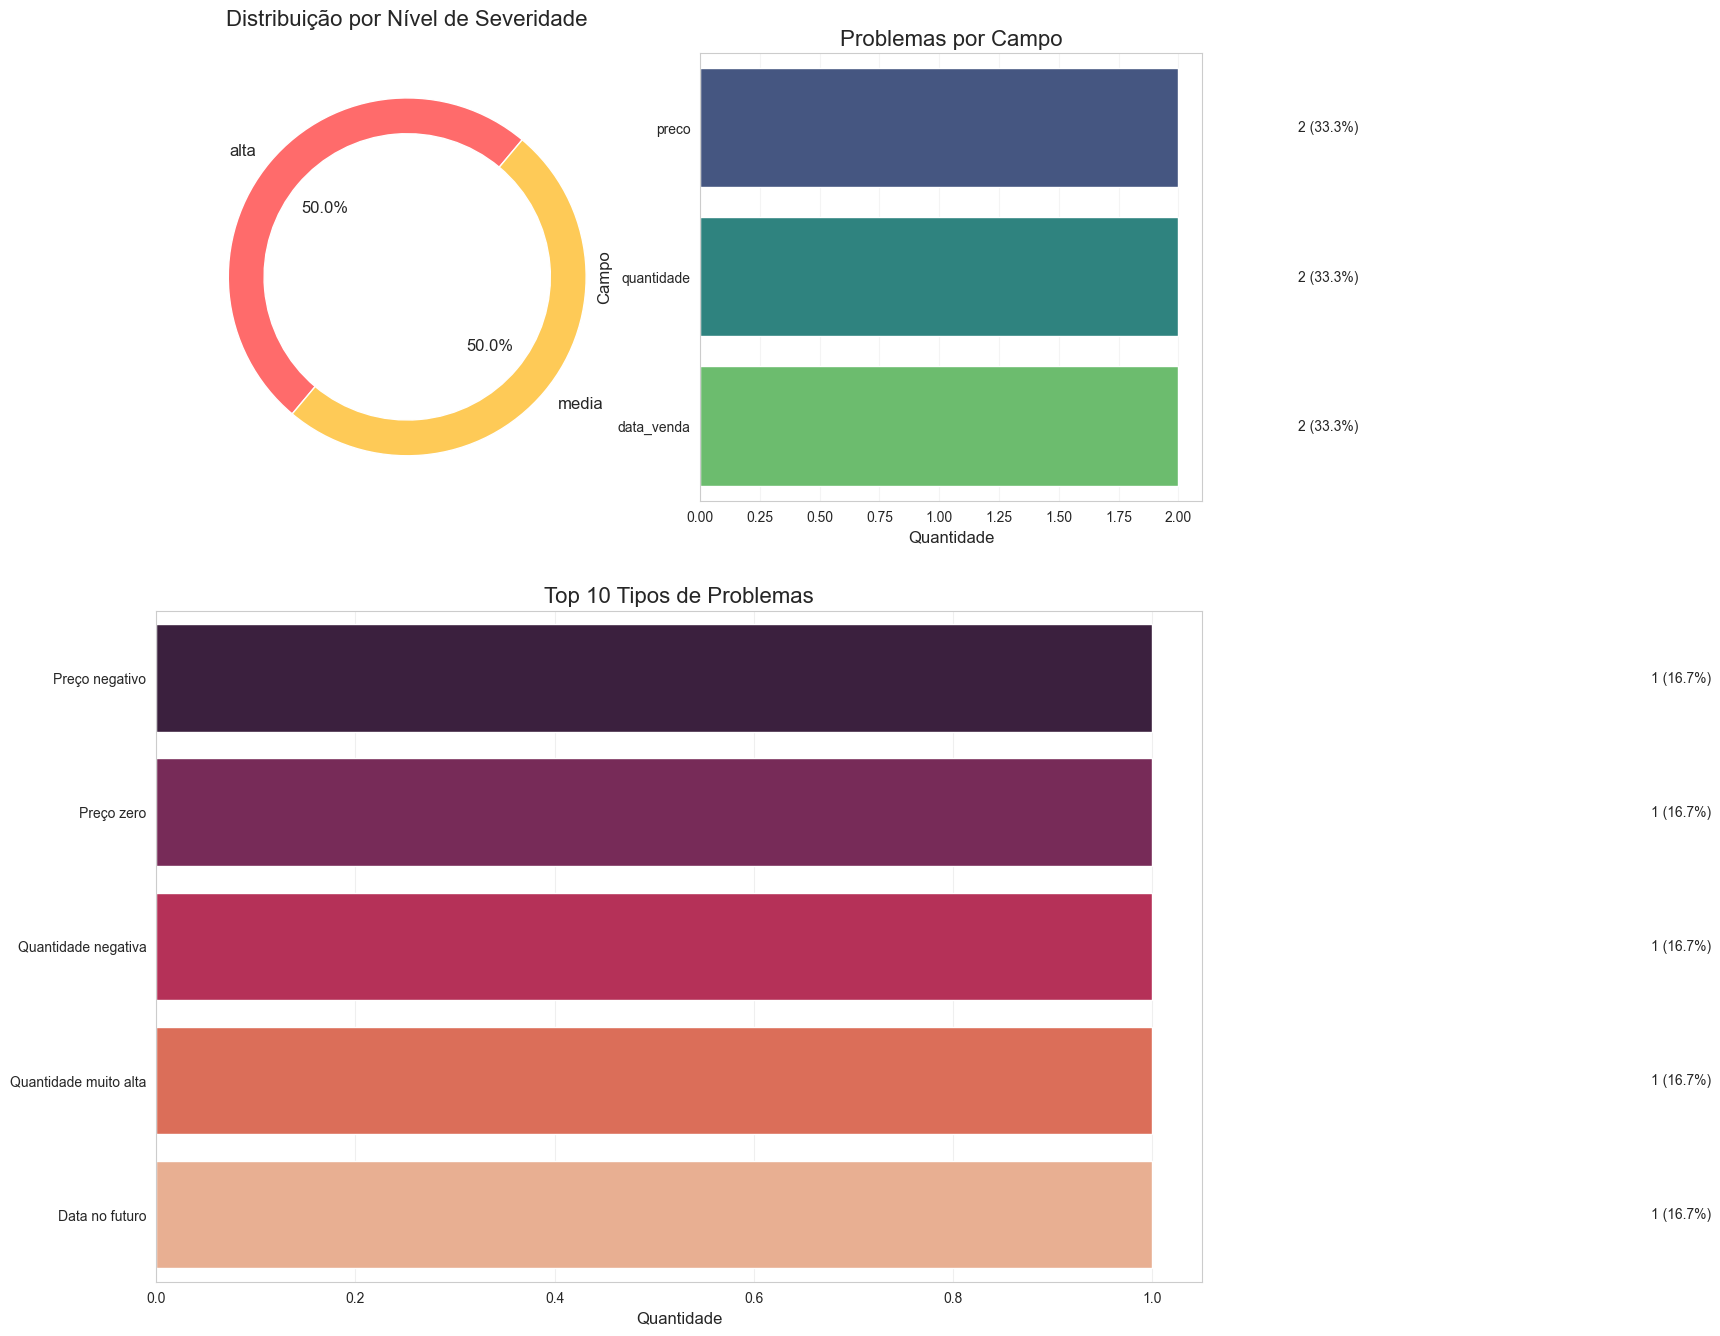

In [97]:
import matplotlib.gridspec as gridspec

def plotar_problemas(problemas):
    fig = plt.figure(figsize=(20, 14))
    gs = gridspec.GridSpec(2, 2, height_ratios=[1, 1.5]) 
    
    # Gráfico 1 - Severidade
    ax1 = fig.add_subplot(gs[0, 0])
    severidade_counts = problemas['severidade'].value_counts().loc[['alta', 'media']]
    colors = ['#ff6b6b', '#feca57']
    ax1.pie(severidade_counts, labels=severidade_counts.index, colors=colors,
            autopct='%1.1f%%', startangle=50, wedgeprops=dict(width=0.2),
            textprops={'fontsize': 12})
    ax1.set_title('Distribuição por Nível de Severidade', fontsize=16, pad=20)
    
    # Gráfico 2 - Campo
    ax2 = fig.add_subplot(gs[0, 1])
    campo_counts = problemas['campo'].value_counts()
    sns.barplot(x=campo_counts.values, y=campo_counts.index,
                hue=campo_counts.index, palette='viridis',
                dodge=False, legend=False, ax=ax2)
    ax2.set_title('Problemas por Campo', fontsize=16)
    ax2.set_xlabel('Quantidade', fontsize=12)
    ax2.set_ylabel('Campo', fontsize=12)
    ax2.grid(axis='x', alpha=0.2)
    for i, v in enumerate(campo_counts.values):
        ax2.text(v + 0.5, i, f'{v} ({100*v/len(problemas):.1f}%)',
                 va='center', fontsize=10)
    
    # Gráfico 3 - Top Problemas
    ax3 = fig.add_subplot(gs[1, :])  
    top_problemas = problemas['problema'].value_counts().nlargest(5)
    sns.barplot(x=top_problemas.values, y=top_problemas.index,
                hue=top_problemas.index, palette='rocket',
                legend=False, ax=ax3)
    ax3.set_title('Top 10 Tipos de Problemas', fontsize=16)
    ax3.set_xlabel('Quantidade', fontsize=12)
    ax3.set_ylabel('')
    ax3.grid(axis='x', alpha=0.3)
    for i, v in enumerate(top_problemas.values):
        ax3.text(v + 0.5, i, f'{v} ({100*v/len(problemas):.1f}%)',
                 va='center', fontsize=10)
    
    plt.tight_layout(pad=3)
    plt.show()


plotar_problemas(problemas)

In [67]:

def analisar_vendas(df):
    """Realiza análises de vendas com os dados válidos"""
    # Criar coluna de valor total
    df['valor_total'] = df['preco'] * df['quantidade']
    
    # Análise por categoria
    vendas_por_categoria = df.groupby('categoria').agg({
        'quantidade': 'sum',
        'valor_total': 'sum',
        'id': 'count'
    }).rename(columns={'id': 'transacoes'})
    
    # Análise por região
    vendas_por_regiao = df.groupby('regiao').agg({
        'valor_total': 'sum',
        'id': 'count'
    }).rename(columns={'id': 'transacoes'})
    
    # Análise por vendedor
    vendas_por_vendedor = df.groupby('vendedor_id').agg({
        'valor_total': 'sum',
        'id': 'count'
    }).rename(columns={'id': 'transacoes'})
    
    return {
        'por_categoria': vendas_por_categoria,
        'por_regiao': vendas_por_regiao,
        'por_vendedor': vendas_por_vendedor
    }

# Filtrando apenas registros válidos (sem problemas)
ids_com_problemas = problemas['id_registro'].unique()
df_vendas_validas = df_vendas[~df_vendas['id'].isin(ids_com_problemas)].copy()

# Realizando análises
analises = analisar_vendas(df_vendas_validas)

print("\nVendas por Categoria:")
print(analises['por_categoria'])

print("\nVendas por Região:")
print(analises['por_regiao'])

print("\nVendas por Vendedor:")
print(analises['por_vendedor'])



Vendas por Categoria:
             quantidade  valor_total  transacoes
categoria                                       
Acessórios           24      3371.76           4
Cabo                 10       299.90           1
Eletrônicos           8     14399.92           6
Periféricos          13       889.87           2
Rede                  1       349.99           1

Vendas por Região:
                valor_total  transacoes
regiao                                 
Belo Horizonte      2099.94           2
Curitiba             639.92           1
Fortaleza            549.85           2
Porto Alegre        1199.97           1
Recife              2949.97           2
Salvador             299.99           1
São Paulo          11571.80           5

Vendas por Vendedor:
             valor_total  transacoes
vendedor_id                         
V001             7909.90           4
V002             3051.64           5
V003             8349.90           5


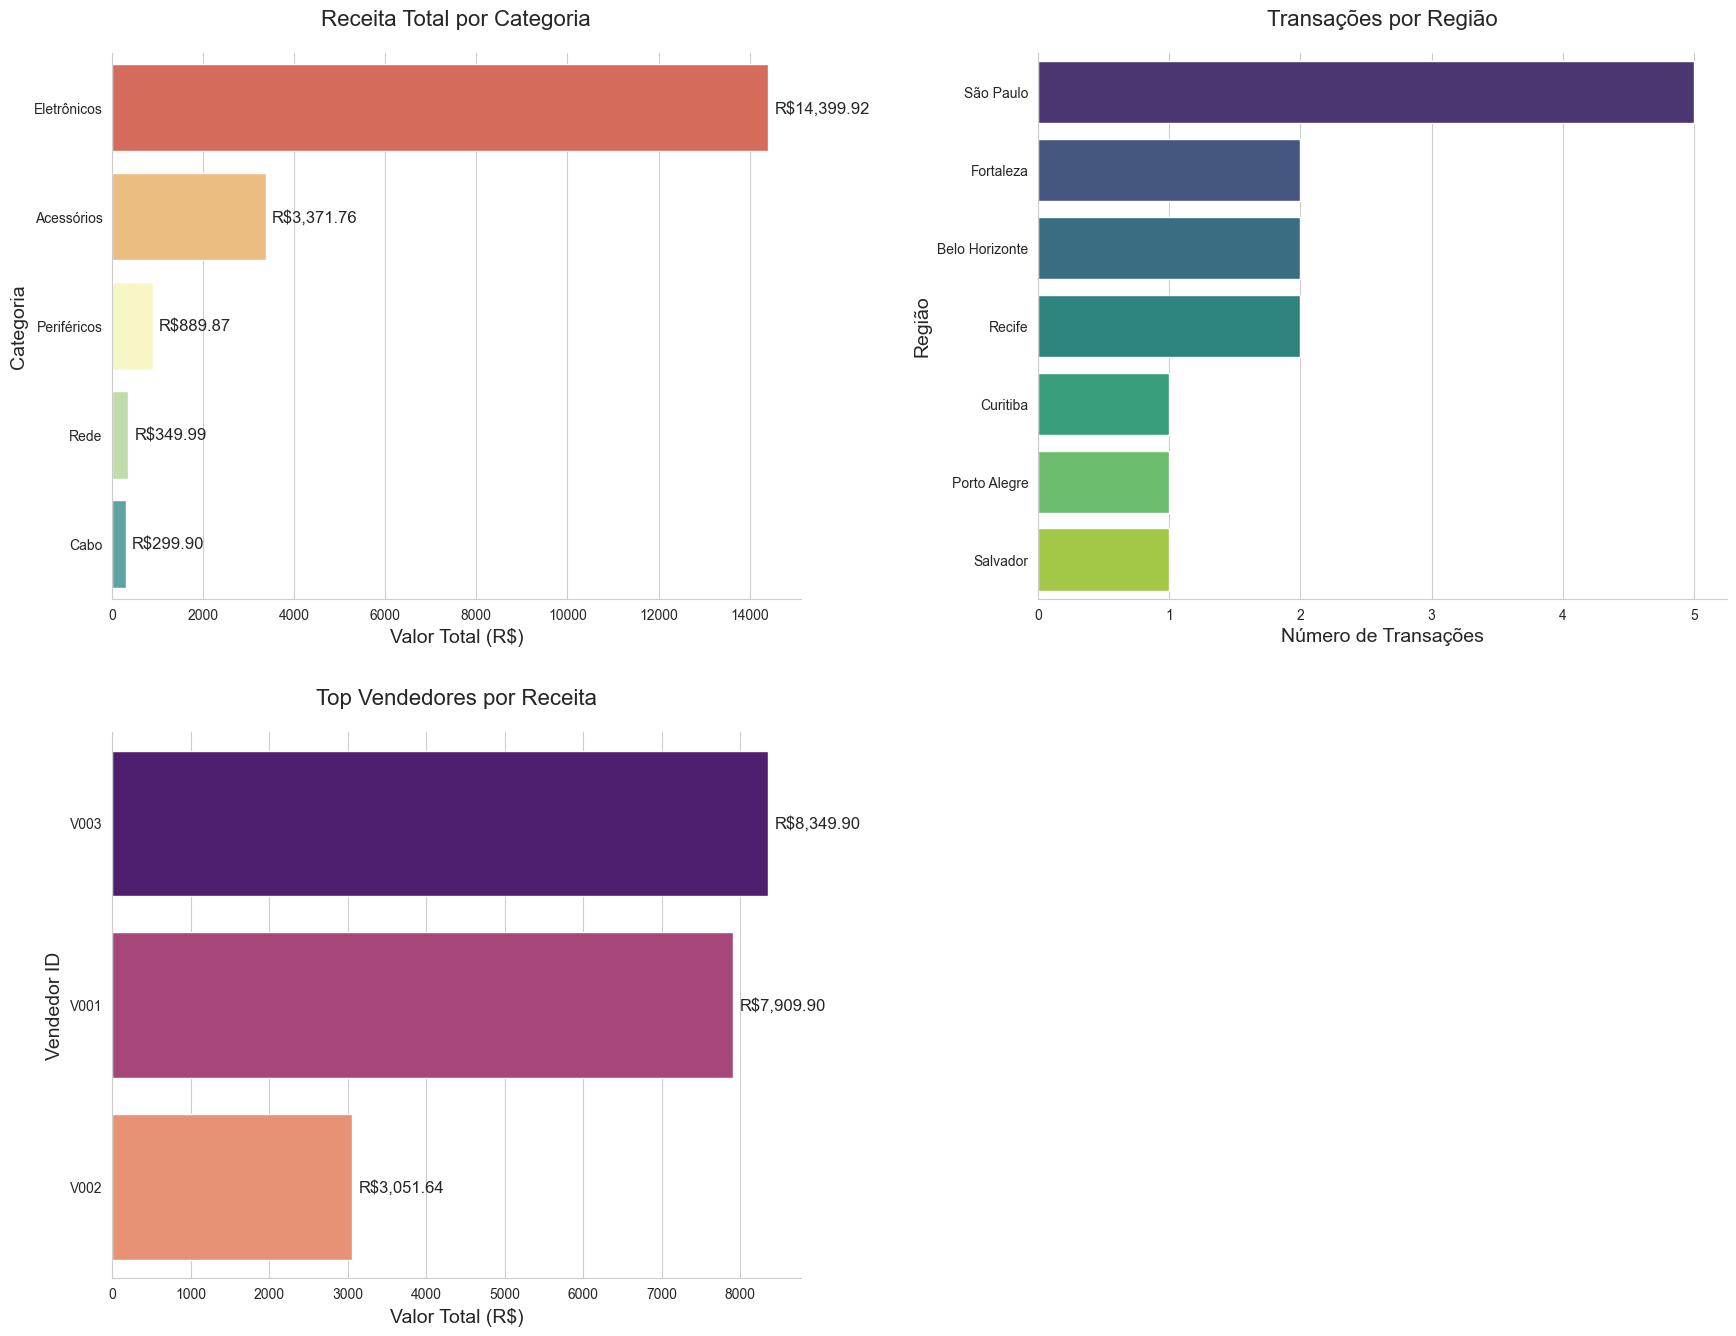

In [100]:
def plotar_analises(analises):
    """Visualização das análises com gráficos de barra (versão atualizada)"""
    plt.figure(figsize=(18, 14))
    
    # Pré-processamento dos dados
    df_categoria = analises['por_categoria'].reset_index()
    df_categoria['categoria'] = df_categoria['categoria'].astype(str)
    df_categoria = df_categoria.sort_values('valor_total', ascending=False)
    
    df_regiao = analises['por_regiao'].reset_index()
    df_regiao['regiao'] = df_regiao['regiao'].astype(str)
    df_regiao = df_regiao.sort_values('transacoes', ascending=False)
    
    df_vendedores = analises['por_vendedor'].reset_index()
    df_vendedores = df_vendedores.sort_values('valor_total', ascending=False).head(5)
    
    # Gráfico 1: Vendas por Categoria
    plt.subplot(2, 2, 1)
    ax1 = sns.barplot(
        data=df_categoria,
        x='valor_total',
        y='categoria',
        hue='categoria',
        palette='Spectral',
        orient='h',
        legend=False
    )
    plt.title('Receita Total por Categoria', fontsize=16, pad=20)
    plt.xlabel('Valor Total (R$)', fontsize=14)
    plt.ylabel('Categoria', fontsize=14)
    
    # Adicionar valores formatados
    for p in ax1.patches:
        width = p.get_width()
        ax1.text(
            width + (0.01 * df_categoria['valor_total'].max()), 
            p.get_y() + p.get_height()/2,
            f'R${width:,.2f}',
            ha='left',
            va='center',
            fontsize=12
        )
    
    # Gráfico 2: Transações por Região
    plt.subplot(2, 2, 2)
    ax2 = sns.barplot(
        data=df_regiao,
        x='transacoes',
        y='regiao',
        hue='regiao', 
        palette='viridis',
        orient='h',
        legend=False
    )
    plt.title('Transações por Região', fontsize=16, pad=20)
    plt.xlabel('Número de Transações', fontsize=14)
    plt.ylabel('Região', fontsize=14)
    
    # Gráfico 3: Top 5 Vendedores
    plt.subplot(2, 2, 3)
    ax3 = sns.barplot(
        data=df_vendedores,
        x='valor_total',
        y='vendedor_id',
        hue='vendedor_id',  
        palette='magma',
        orient='h',
        legend=False
    )
    plt.title('Top Vendedores por Receita', fontsize=16, pad=20)
    plt.xlabel('Valor Total (R$)', fontsize=14)
    plt.ylabel('Vendedor ID', fontsize=14)
    
    # Adicionar valores formatados
    for p in ax3.patches:
        width = p.get_width()
        ax3.text(
            width + (0.01 * df_vendedores['valor_total'].max()),
            p.get_y() + p.get_height()/2,
            f'R${width:,.2f}',
            ha='left',
            va='center',
            fontsize=12
        )
    
  
    plt.tight_layout(pad=3.0)
    sns.despine()
    plt.show()

plotar_analises(analises)


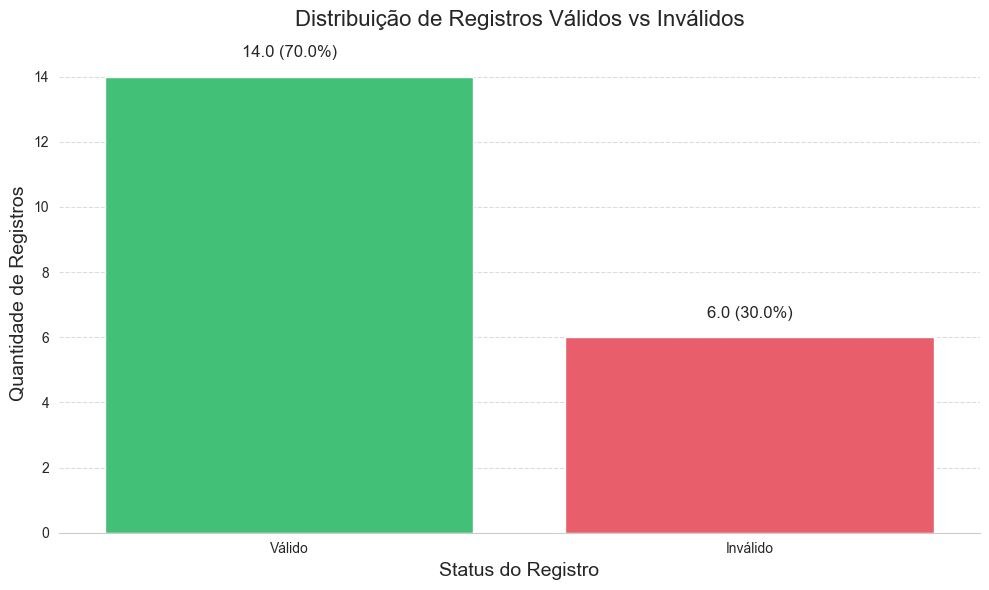

In [ ]:
# Gráfico de Comparação Válidos vs Inválidos 
plt.figure(figsize=(10, 6))

# Preparar os dados
df_vendas['status'] = np.where(df_vendas['id'].isin(ids_com_problemas), 'Inválido', 'Válido')
status_data = df_vendas['status'].value_counts().reset_index()
status_data.columns = ['status', 'quantidade']

# Criar o gráfico de barras
ax = sns.barplot(
    data=status_data,
    x='status',
    y='quantidade',
    hue='status',  
    palette=['#2ed573', '#ff4757'],
    legend=False 
)

plt.title('Distribuição de Registros Válidos vs Inválidos', fontsize=16, pad=20)
plt.xlabel('Status do Registro', fontsize=14)
plt.ylabel('Quantidade de Registros', fontsize=14)

# Adicionar porcentagens e valores absolutos
total = len(df_vendas)
for p in ax.patches:
    height = p.get_height()
    percentage = 100 * height/total
    ax.text(
        p.get_x() + p.get_width()/2.,
        height + 0.5,
        f'{height} ({percentage:.1f}%)',
        ha='center',
        va='bottom',
        fontsize=12
    )


sns.despine(left=True)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [102]:
def gerar_recomendacoes(problemas, analises):
    """Gera recomendações baseadas nos problemas e análises encontradas"""
    recomendacoes = []
    
    if 'preco' in problemas['campo'].values:
        count = len(problemas[problemas['campo'] == 'preco'])
        recomendacoes.append(
            f"Implementar validação automática de preços. {count} registros com problemas de preço encontrados."
        )
    
    if 'quantidade' in problemas['campo'].values:
        count = len(problemas[problemas['campo'] == 'quantidade'])
        recomendacoes.append(
            f"Revisar sistema de entrada de quantidades. {count} registros com quantidades inválidas."
        )
    
    if 'data_venda' in problemas['campo'].values:
        count = len(problemas[problemas['campo'] == 'data_venda'])
        recomendacoes.append(
            f"Implementar validação de datas no sistema. {count} registros com datas inválidas."
        )
    

    if 'categoria' in problemas['campo'].values:
        count = len(problemas[problemas['campo'] == 'categoria'])
        recomendacoes.append(
            f"Padronizar categorias de produtos. {count} registros com categorias não padronizadas."
        )
    
    vendedor_top = analises['por_vendedor']['valor_total'].idxmax()
    vendedor_bottom = analises['por_vendedor']['valor_total'].idxmin()
    recomendacoes.append(
        f"Investigar diferença de desempenho entre vendedores. Melhor: {vendedor_top}, Pior: {vendedor_bottom}"
    )
    
    categoria_top = analises['por_categoria']['valor_total'].idxmax()
    recomendacoes.append(
        f"Aumentar investimento em estoque para categoria {categoria_top} (mais vendida)"
    )
    
    print("\n=== RECOMENDAÇÕES ===")
    for i, rec in enumerate(recomendacoes, 1):
        print(f"{i}. {rec}")

gerar_recomendacoes(problemas, analises)


=== RECOMENDAÇÕES ===
1. Implementar validação automática de preços. 2 registros com problemas de preço encontrados.
2. Revisar sistema de entrada de quantidades. 2 registros com quantidades inválidas.
3. Implementar validação de datas no sistema. 2 registros com datas inválidas.
4. Investigar diferença de desempenho entre vendedores. Melhor: V003, Pior: V002
5. Aumentar investimento em estoque para categoria Eletrônicos (mais vendida)
